In [32]:
import pandas as pd
import numpy as np


# Data Wrangling

In [33]:
df = pd.read_csv('source/listings-2.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27051 entries, 0 to 27050
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            27051 non-null  int64  
 1   listing_url                                   27051 non-null  object 
 2   scrape_id                                     27051 non-null  int64  
 3   last_scraped                                  27051 non-null  object 
 4   source                                        27051 non-null  object 
 5   name                                          27051 non-null  object 
 6   description                                   26309 non-null  object 
 7   neighborhood_overview                         13736 non-null  object 
 8   picture_url                                   27051 non-null  object 
 9   host_id                                       27051 non-null 

In [35]:
df.shape

(27051, 79)

In [36]:
df.sample(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
20035,1201682775137194247,https://www.airbnb.com/rooms/1201682775137194247,20250927041820,2025-09-27,city scrape,"Estudio 1 o 2 Pax. Gran ubicación""´",Enjoy the simplicity of this quiet and central...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,14802955,...,5.00,5.00,5.00,NaN,f,5,5,0,0,1.83
15794,960457039383169905,https://www.airbnb.com/rooms/960457039383169905,20250927041820,2025-09-28,city scrape,"Elegante, cómodo y bien ubicado.",Enjoy a stylish experience in this centrally l...,You can find everything you could need in two ...,https://a0.muscache.com/pictures/hosting/Hosti...,195253877,...,4.89,4.92,4.87,NaN,f,7,7,0,0,1.49
18284,1111177696557778203,https://www.airbnb.com/rooms/1111177696557778203,20250927041820,2025-09-28,city scrape,2BR/2BA apt in Roma Norte,Elevator directly to unit. Super well located ...,"Located in the heart of Roma, the trendiest ne...",https://a0.muscache.com/pictures/miso/Hosting-...,111782560,...,5.00,4.96,4.79,NaN,t,1,1,0,0,1.30
19449,1173637610978339415,https://www.airbnb.com/rooms/1173637610978339415,20250927041820,2025-09-28,city scrape,Polanco-Lomas | Quad | Self Check-In,From this centrally located accommodation the ...,NaN,https://a0.muscache.com/pictures/c11b1f07-e348...,61030249,...,5.00,4.75,4.25,NaN,t,38,9,28,1,0.53
7589,47272859,https://www.airbnb.com/rooms/47272859,20250927041820,2025-09-27,city scrape,Hermoso departamento con oficina y 2 baños,"Full apartment, with one room (queen bed, TV (...",NaN,https://a0.muscache.com/pictures/0283d0b0-1a49...,50914071,...,5.00,5.00,5.00,NaN,f,2,2,0,0,0.10


In [37]:
# Select only main columns
main_columns = [
    'id',
    'name',
    'description',
    'host_id',
    'host_name',
    'host_since',
    'host_response_rate',
    'host_is_superhost',
    'neighbourhood_cleansed',
    'latitude',
    'longitude',
    'property_type',
    'room_type',
    'accommodates',
    'bathrooms_text',
    'bedrooms',
    'beds',
    'price',
    'minimum_nights',
    'maximum_nights',
    'availability_365',
    'number_of_reviews',
    'review_scores_rating',
    'review_scores_cleanliness',
    'review_scores_location',
    'instant_bookable',
    'reviews_per_month'
]

# Drop columns that aren't in main_columns
columns_to_drop = [col for col in df.columns if col not in main_columns]
print(f"Original dataframe: {df.shape}")
print(f"Dropping {len(columns_to_drop)} columns...")
df.drop(columns=columns_to_drop, inplace=True)
print(f"New dataframe: {df.shape}")
df.head()

Original dataframe: (27051, 79)
Dropping 52 columns...
New dataframe: (27051, 27)


,id,name,description,host_id,host_name,host_since,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,...,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,instant_bookable,reviews_per_month
0,35797,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",153786,Dici,2010-06-28,NaN,f,Cuajimalpa de Morelos,19.38283,...,"$3,673.00",1,7,363,0,NaN,NaN,NaN,f,NaN
1,44616,Condesa Haus,A new concept of hosting in mexico through a b...,196253,Fernando,2010-08-09,100%,f,Cuauhtémoc,19.41162,...,"$18,000.00",1,180,360,65,4.59,4.70,4.98,f,0.38
2,56074,Great space in historical San Rafael,This great apartment is located in one of the ...,265650,Maris,2010-10-19,100%,t,Cuauhtémoc,19.43977,...,$591.00,15,250,333,84,4.87,4.88,4.76,f,0.48
3,67703,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",334451,Nicholas,2011-01-04,88%,f,Cuauhtémoc,19.41152,...,NaN,2,30,252,50,4.90,4.76,4.98,f,0.30
4,70644,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,212109,Trisha,2010-08-24,100%,t,Coyoacán,19.35448,...,NaN,3,180,234,134,4.91,4.96,4.96,f,0.81


## Validate and Handle Missing Values

In [38]:
# Separate columns into discrete and continuous
threshold_unique = 10  
discrete_cols = []
continuous_cols = []

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
        discrete_cols.append(col)
    elif pd.api.types.is_integer_dtype(df[col]):
        unique_count = df[col].nunique()
        if unique_count <= threshold_unique:
            discrete_cols.append(col)
        else:
            continuous_cols.append(col)
    else:
        continuous_cols.append(col)
    
# Create DataFrames with each type
df_discrete = df[discrete_cols]
df_continuous = df[continuous_cols]

df_continuous.info()
df_discrete.info()

print(f"\nDiscrete DataFrame shape: {df_discrete.shape}")
print(f"Continuous DataFrame shape: {df_continuous.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27051 entries, 0 to 27050
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         27051 non-null  int64  
 1   host_id                    27051 non-null  int64  
 2   latitude                   27051 non-null  float64
 3   longitude                  27051 non-null  float64
 4   accommodates               27051 non-null  int64  
 5   bedrooms                   26071 non-null  float64
 6   beds                       23545 non-null  float64
 7   minimum_nights             27051 non-null  int64  
 8   maximum_nights             27051 non-null  int64  
 9   availability_365           27051 non-null  int64  
 10  number_of_reviews          27051 non-null  int64  
 11  review_scores_rating       23650 non-null  float64
 12  review_scores_cleanliness  23649 non-null  float64
 13  review_scores_location     23649 non-null  flo

In [39]:
# Create a copy to preserve original data
df_imputed = df.copy()

# Impute discrete columns with mode
print("\nImputing DISCRETE columns with MODE:")
for col in discrete_cols:
    if df_imputed[col].isnull().sum() > 0:
        mode_value = df_imputed[col].mode()
        if len(mode_value) > 0:
            df_imputed[col].fillna(mode_value[0], inplace=True)
            print(f"  • {col}: filled {df[col].isnull().sum()} nulls with '{mode_value[0]}'")

# Impute continuous columns with mean
print("\nImputing CONTINUOUS columns with MEAN:")
for col in continuous_cols:
    if df_imputed[col].isnull().sum() > 0:
        mean_value = df_imputed[col].mean()
        df_imputed[col].fillna(mean_value, inplace=True)
        print(f"  • {col}: filled {df[col].isnull().sum()} nulls with {mean_value:.2f}")

# Verify imputation
remaining_nulls = df_imputed.isnull().sum().sum()
print(f"\n" + "=" * 60)
print(f"IMPUTATION COMPLETE")
print(f"=" * 60)
print(f"Remaining missing values: {remaining_nulls}")
print(f"Successfully imputed: {df.isnull().sum().sum() - remaining_nulls} values")


Imputing DISCRETE columns with MODE:
  • description: filled 742 nulls with 'Enjoy the simplicity of this quiet and central accommodation.'
  • host_name: filled 6 nulls with 'Alejandro'
  • host_since: filled 6 nulls with '2023-01-30'
  • host_response_rate: filled 3955 nulls with '100%'
  • host_is_superhost: filled 1665 nulls with 'f'
  • bathrooms_text: filled 41 nulls with '1 bath'
  • price: filled 3484 nulls with '$450.00'

Imputing CONTINUOUS columns with MEAN:
  • bedrooms: filled 980 nulls with 1.55
  • beds: filled 3506 nulls with 1.96
  • review_scores_rating: filled 3401 nulls with 4.75
  • review_scores_cleanliness: filled 3402 nulls with 4.75
  • review_scores_location: filled 3402 nulls with 4.84
  • reviews_per_month: filled 3401 nulls with 1.85

IMPUTATION COMPLETE
Remaining missing values: 0
Successfully imputed: 27991 values


In [40]:
# Analyze missing values before imputation
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

# Total missing values per column
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)

print(f"\nColumns with missing values: {len(missing_summary)}")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"\nTop 10 columns with most missing values:")
print(missing_summary.head(10))


MISSING VALUES ANALYSIS

Columns with missing values: 13
Total missing values: 27991

Top 10 columns with most missing values:
host_response_rate           3955
beds                         3506
price                        3484
review_scores_cleanliness    3402
review_scores_location       3402
review_scores_rating         3401
reviews_per_month            3401
host_is_superhost            1665
bedrooms                      980
description                   742
dtype: int64


## Handle Outliers

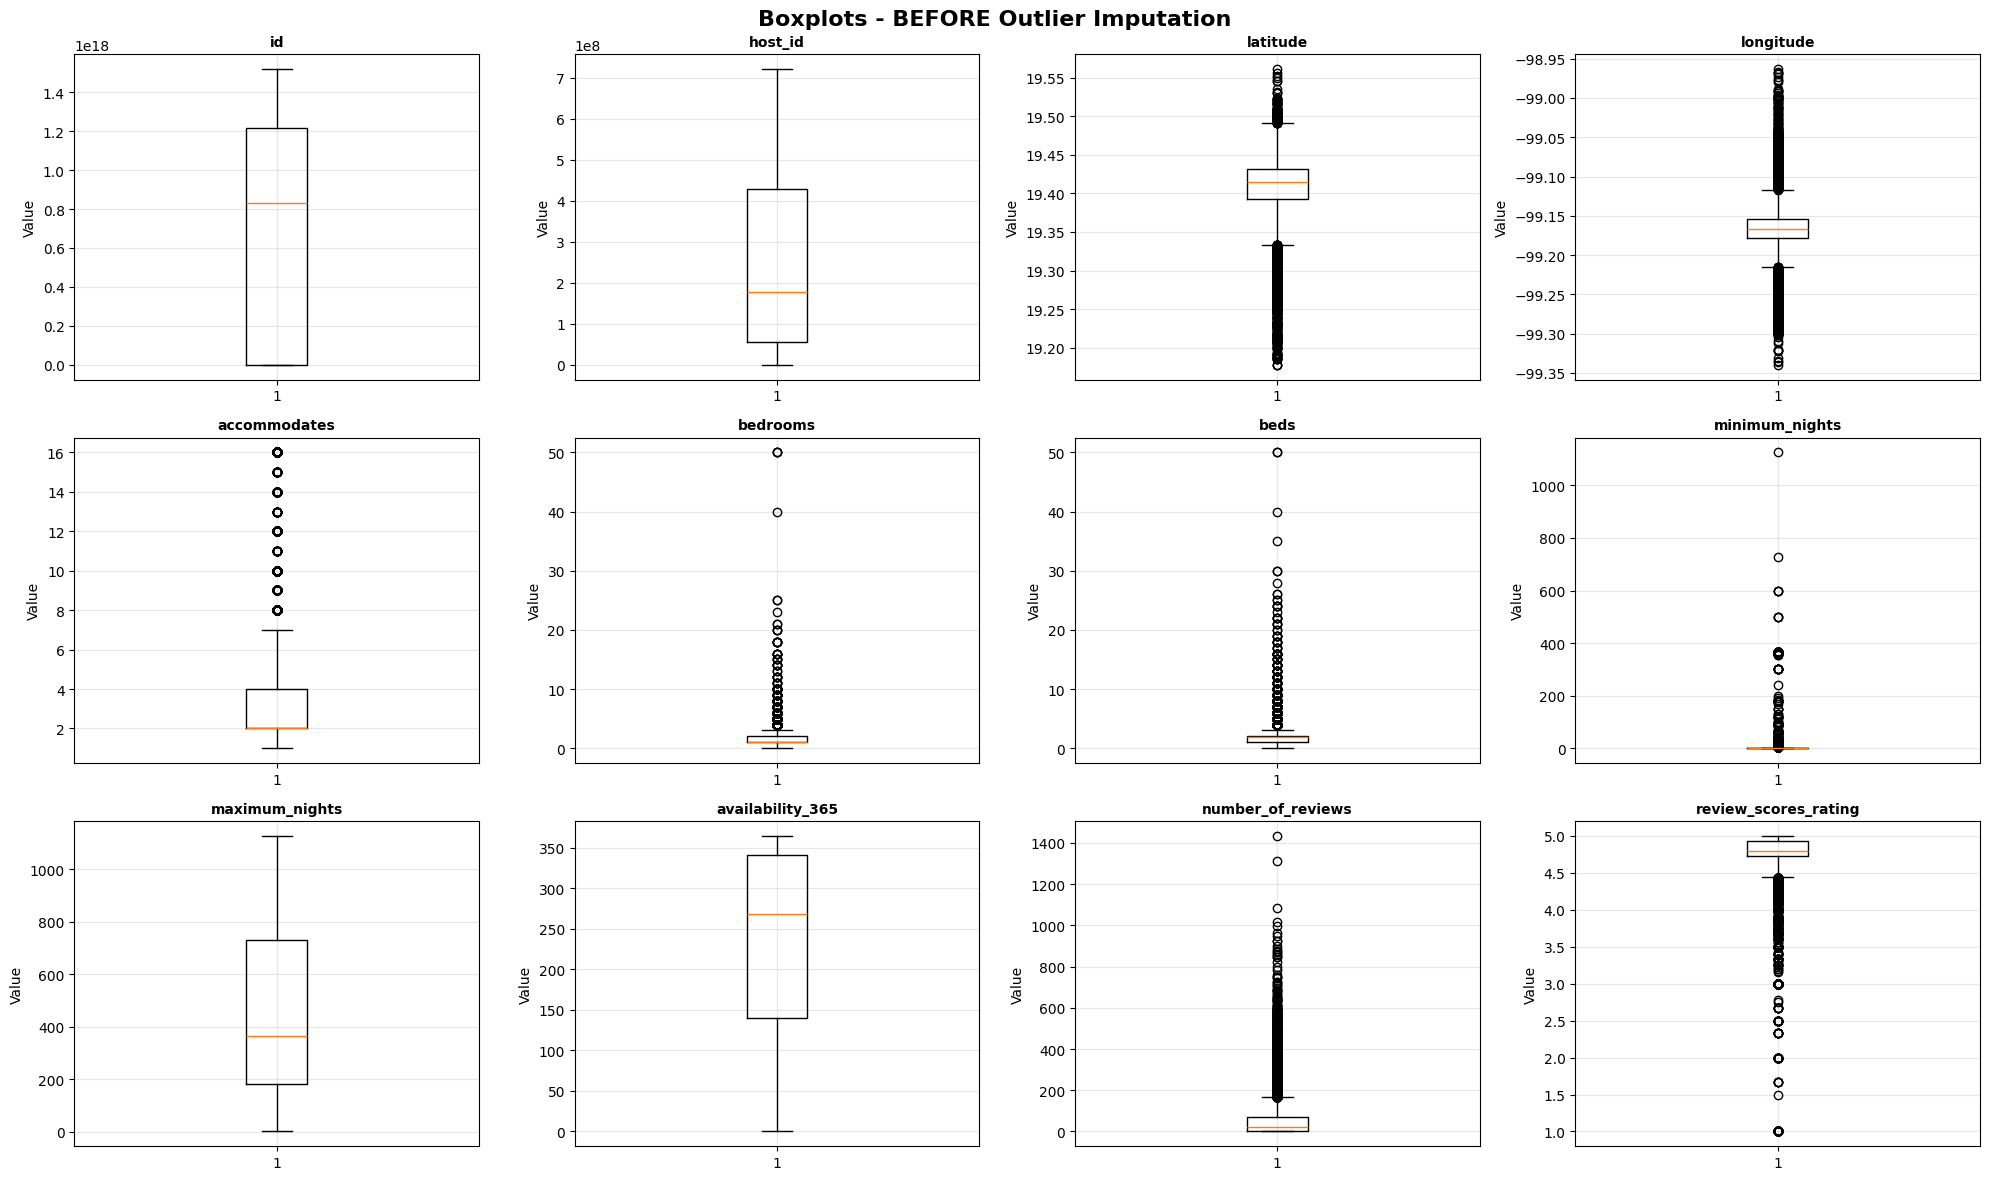

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
fig.suptitle('Boxplots - BEFORE Outlier Imputation', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, col in enumerate(continuous_cols):
    if idx < len(axes):
        axes[idx].boxplot(df_imputed[col].dropna(), vert=True)
        axes[idx].set_title(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Value')
        axes[idx].grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(len(continuous_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [42]:
outlier_summary = {}

for col in continuous_cols:
    if df_imputed[col].dtype in ['float64', 'int64']:
        Q1 = df_imputed[col].quantile(0.25)
        Q3 = df_imputed[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((df_imputed[col] < lower_bound) | (df_imputed[col] > upper_bound))

        outlier_count = outliers.sum()

        
        if outlier_count > 0:
            outlier_summary[col] = {
                'count': outlier_count,
                'percentage': (outlier_count / len(df_imputed)) * 100,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
            print(f"\n{col}:")
            print(f"  Outliers found: {outlier_count} ({outlier_summary[col]['percentage']:.2f}%)")
            print(f"  Valid range: [{lower_bound:.2f}, {upper_bound:.2f}]")

        outliers_before = ((df_imputed[col] < lower_bound) | (df_imputed[col] > upper_bound)).sum()
        
        # Cap df_ at boundaries
        df_imputed[col] = df_imputed[col].clip(lower=lower_bound, upper=upper_bound)
        
        # Verify outliers after
        outliers_after = ((df_imputed[col] < lower_bound) | (df_imputed[col] > upper_bound)).sum()

print(f"\n\nTotal columns with outliers: {len(outlier_summary)}")
print(f"Total outliers detected: {sum(s['count'] for s in outlier_summary.values())}")
print(f"  • {col}: {outliers_before} outliers capped → {outliers_after} remaining")


print("\n" + "=" * 60)
print("OUTLIER IMPUTATION COMPLETE")
print("=" * 60)
print(f"Total outliers imputed: {sum(s['count'] for s in outlier_summary.values())}")
print(f"\nDataFrame shape: {df_imputed.shape}")
print(f"Remaining missing values: {df_imputed.isnull().sum().sum()}")


latitude:
  Outliers found: 1937 (7.16%)
  Valid range: [19.33, 19.49]

longitude:
  Outliers found: 3024 (11.18%)
  Valid range: [-99.22, -99.12]

accommodates:
  Outliers found: 1317 (4.87%)
  Valid range: [-1.00, 7.00]

bedrooms:
  Outliers found: 855 (3.16%)
  Valid range: [-0.50, 3.50]

beds:
  Outliers found: 2333 (8.62%)
  Valid range: [-0.50, 3.50]

minimum_nights:
  Outliers found: 3429 (12.68%)
  Valid range: [-0.50, 3.50]

number_of_reviews:
  Outliers found: 2193 (8.11%)
  Valid range: [-93.50, 166.50]

review_scores_rating:
  Outliers found: 2034 (7.52%)
  Valid range: [4.43, 5.23]

review_scores_cleanliness:
  Outliers found: 2010 (7.43%)
  Valid range: [4.42, 5.26]

review_scores_location:
  Outliers found: 2183 (8.07%)
  Valid range: [4.60, 5.21]

reviews_per_month:
  Outliers found: 1358 (5.02%)
  Valid range: [-2.15, 5.08]


Total columns with outliers: 11
Total outliers detected: 22673
  • reviews_per_month: 1358 outliers capped → 0 remaining

OUTLIER IMPUTATION COM

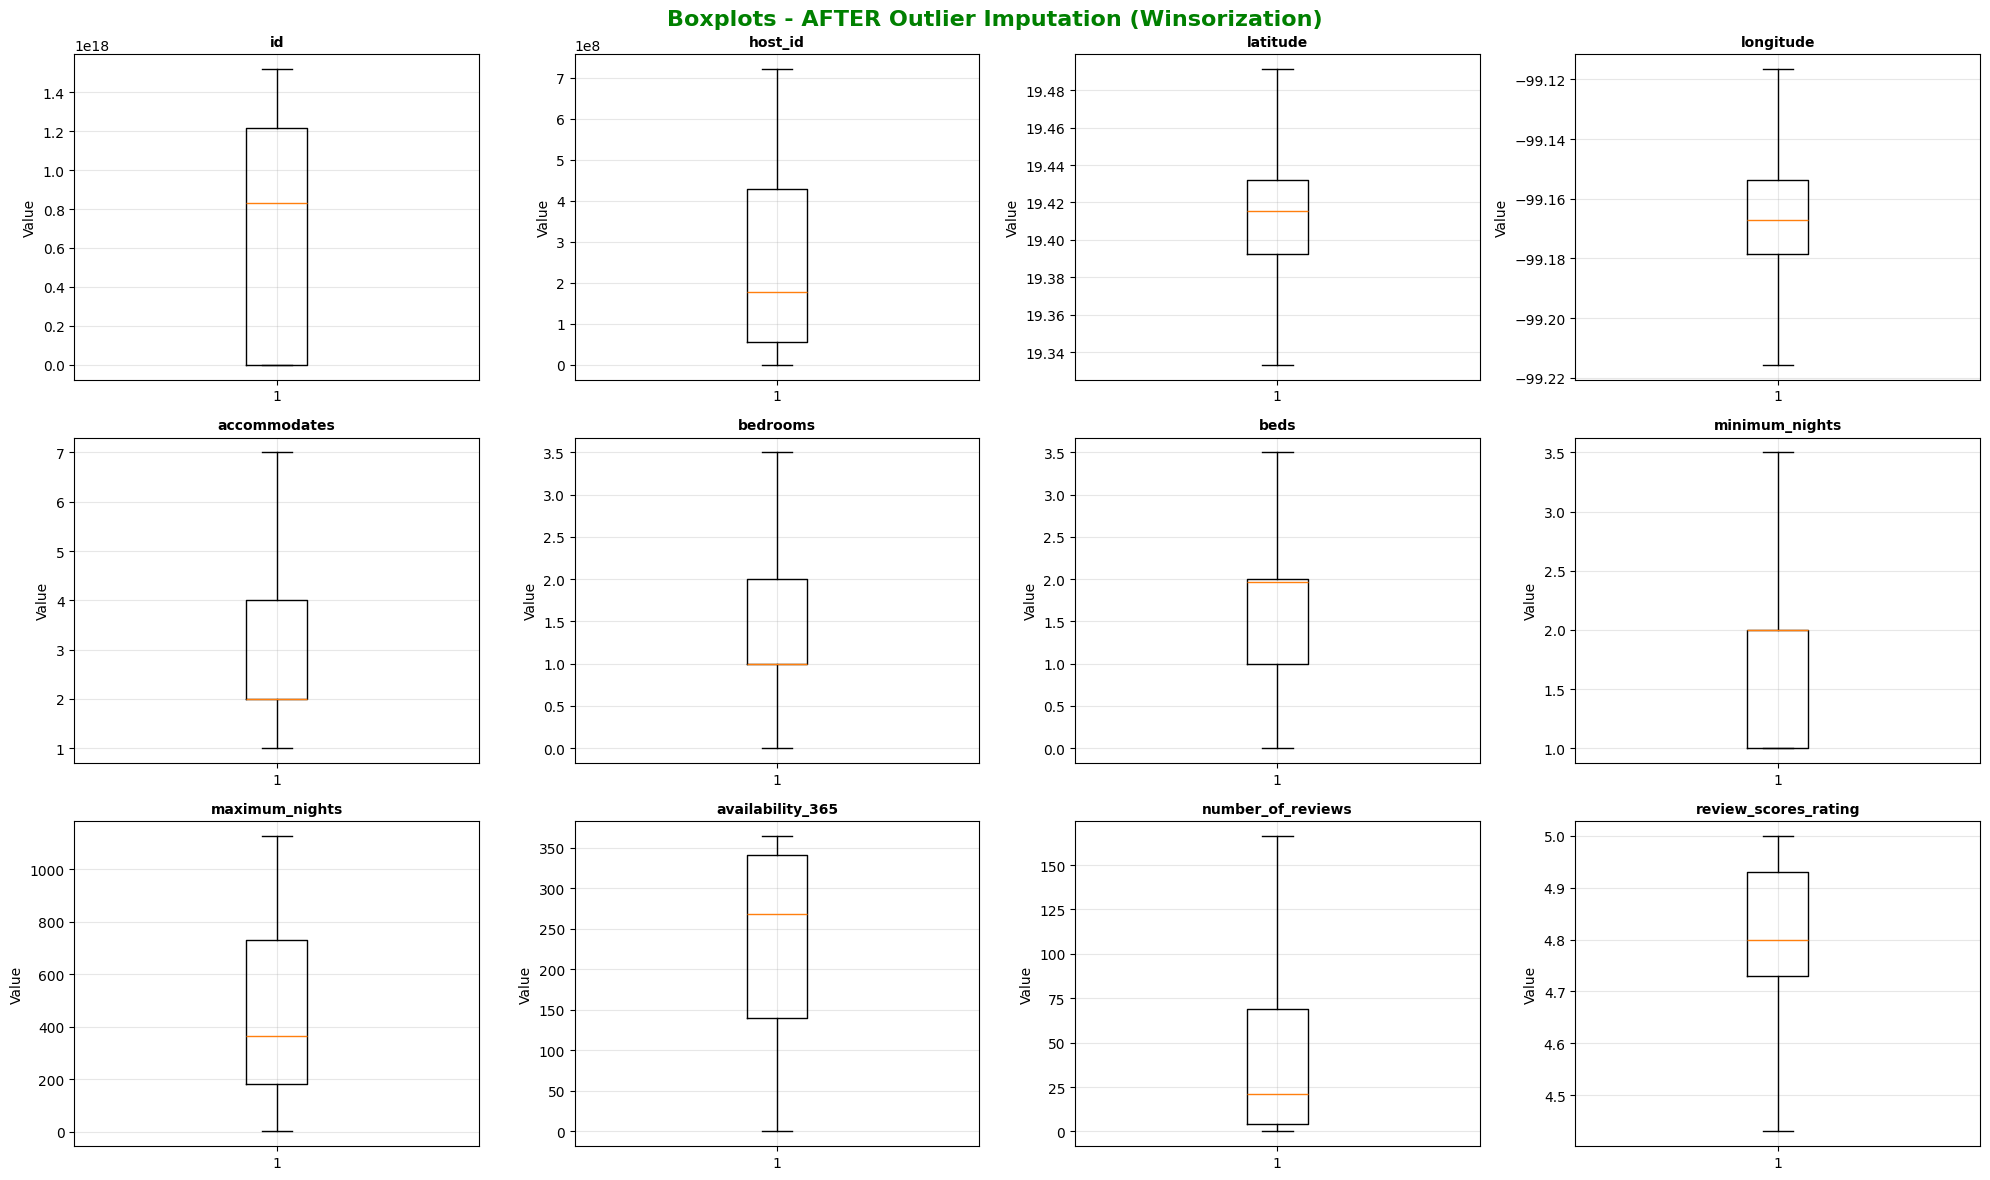

In [43]:
# Visualize outliers with boxplots - AFTER imputation
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
fig.suptitle('Boxplots - AFTER Outlier Imputation (Winsorization)', fontsize=16, fontweight='bold', color='green')
axes = axes.flatten()

for idx, col in enumerate(continuous_cols):
    if idx < len(axes):
        axes[idx].boxplot(df_imputed[col].dropna(), vert=True)
        axes[idx].set_title(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Value')
        axes[idx].grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(len(continuous_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [44]:
#Unique values
total_rows = len(df_imputed)
unique_cols = []

print(f"\nTotal rows in dataset: {total_rows:,}")
print(f"\nAnalyzing uniqueness of all columns:\n")

for col in df_imputed.columns:
    unique_values = df_imputed[col].nunique()
    unique_percentage = (unique_values / total_rows) * 100
    
    print(f"{col:30s}: {unique_values:7,} unique values ({unique_percentage:6.2f}%)")
    
    # Flag columns where >95% values are unique (likely identifiers)
    if unique_percentage > 95:
        unique_cols.append({
            'column': col,
            'unique_count': unique_values,
            'percentage': unique_percentage
        })

if unique_cols:
    for item in unique_cols:
        print(f"  • {item['column']}: {item['unique_count']:,} unique ({item['percentage']:.2f}%)")
    print(f"\n⚠️  Recommendation: Consider dropping these {len(unique_cols)} column(s)")
else:
    print("✓ No columns with >95% unique values found.")


Total rows in dataset: 27,051

Analyzing uniqueness of all columns:

id                            :  27,051 unique values (100.00%)
name                          :  25,638 unique values ( 94.78%)
description                   :  22,124 unique values ( 81.79%)
host_id                       :  12,046 unique values ( 44.53%)
host_name                     :   4,299 unique values ( 15.89%)
host_since                    :   4,243 unique values ( 15.69%)
host_response_rate            :      72 unique values (  0.27%)
host_is_superhost             :       2 unique values (  0.01%)
neighbourhood_cleansed        :      16 unique values (  0.06%)
latitude                      :  16,026 unique values ( 59.24%)
longitude                     :  14,066 unique values ( 52.00%)
property_type                 :      84 unique values (  0.31%)
room_type                     :       4 unique values (  0.01%)
accommodates                  :       7 unique values (  0.03%)
bathrooms_text                :   

## Ingeniería de variables

In [45]:
df_imputed.columns

Index(['id', 'name', 'description', 'host_id', 'host_name', 'host_since',
       'host_response_rate', 'host_is_superhost', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_location', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

In [46]:
df_imputed.shape

(27051, 27)

In [47]:
# Create feature engineering dataframe
df_fe = df_imputed.copy()

# 1. CLEAN PRICE - Convert to numeric (TARGET VARIABLE)
df_fe['price_numeric'] = df_fe['price'].replace('[\$,]', '', regex=True).astype(float)

# 2. EXTRACT BATHROOMS COUNT
df_fe['bathrooms_count'] = df_fe['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)

# 3. PROPERTY CAPACITY FEATURES
df_fe['total_capacity'] = df_fe['accommodates'] + df_fe['bedrooms'] + df_fe['beds']
df_fe['space_per_person'] = df_fe['total_capacity'] / df_fe['accommodates']
df_fe['guest_to_bed_ratio'] = df_fe['accommodates'] / (df_fe['beds'] + 0.1)  

# 4. QUALITY & REVIEW FEATURES
review_cols = ['review_scores_rating', 'review_scores_cleanliness', 'review_scores_location']
df_fe['avg_review_score'] = df_fe[review_cols].mean(axis=1)
df_fe['review_quality_tier'] = pd.cut(df_fe['avg_review_score'], 
                                       bins=[0, 4.0, 4.5, 5.0], 
                                       labels=['Low', 'Medium', 'High'])
df_fe['has_many_reviews'] = (df_fe['number_of_reviews'] > 50).astype(int)
df_fe['review_recency_score'] = df_fe['reviews_per_month'] * df_fe['number_of_reviews']
print(f"   ✓ Created avg_review_score, review_quality_tier, has_many_reviews, review_recency_score")

#5 Distance from center (approximate center of Mexico City)
center_lat, center_lon = 19.4326, -99.1332
df_fe['distance_from_center'] = np.sqrt(
    (df_fe['latitude'] - center_lat)**2 + 
    (df_fe['longitude'] - center_lon)**2
)
df_fe['is_central_location'] = (df_fe['distance_from_center'] < 0.05).astype(int)
print(f"   ✓ Created neighborhood_avg_price, location_premium, distance_from_center, is_central_location")

# 6. AVAILABILITY & DEMAND FEATURES
df_fe['availability_rate'] = df_fe['availability_365'] / 365
df_fe['scarcity_score'] = 1 - df_fe['availability_rate']
df_fe['booking_flexibility'] = df_fe['maximum_nights'] - df_fe['minimum_nights']
print(f"   ✓ Created availability_rate, scarcity_score, booking_flexibility")

# 7. PROPERTY TYPE ENCODING
# Simplify property types into main categories
def categorize_property(prop_type):
    prop_type = str(prop_type).lower()
    if 'apartment' in prop_type or 'condo' in prop_type:
        return 'Apartment'
    elif 'house' in prop_type or 'villa' in prop_type or 'cottage' in prop_type:
        return 'House'
    elif 'hotel' in prop_type or 'hostel' in prop_type or 'boutique' in prop_type:
        return 'Hotel'
    elif 'loft' in prop_type:
        return 'Loft'
    else:
        return 'Other'

df_fe['property_category'] = df_fe['property_type'].apply(categorize_property)
df_fe['is_entire_home'] = (df_fe['room_type'] == 'Entire home/apt').astype(int)
df_fe['is_private_room'] = (df_fe['room_type'] == 'Private room').astype(int)
print(f"   ✓ Created property_category, is_entire_home, is_private_room")

print(f"\n   Total new features: {len(df_fe.columns) - len(df_imputed.columns)}")
print(f"   Current shape: {df_fe.shape}")

   ✓ Created avg_review_score, review_quality_tier, has_many_reviews, review_recency_score
   ✓ Created neighborhood_avg_price, location_premium, distance_from_center, is_central_location
   ✓ Created availability_rate, scarcity_score, booking_flexibility
   ✓ Created property_category, is_entire_home, is_private_room

   Total new features: 17
   Current shape: (27051, 44)


<>:5: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:8: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:5: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:8: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
/var/folders/m6/s6kk2q1x73n0j334pjjdvxcr0000gn/T/ipykernel_11107/2755786091.py:5: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
  df_fe['price_numeric'] = df_fe['price'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/m6/s6kk2q1x73n0j334pjjdvxcr0000gn/T/ipykernel_11107/27557

In [48]:
# First, check what features are available
print("Available columns in df_fe:")
print(df_fe.columns.tolist())

Available columns in df_fe:
['id', 'name', 'description', 'host_id', 'host_name', 'host_since', 'host_response_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_location', 'instant_bookable', 'reviews_per_month', 'price_numeric', 'bathrooms_count', 'total_capacity', 'space_per_person', 'guest_to_bed_ratio', 'avg_review_score', 'review_quality_tier', 'has_many_reviews', 'review_recency_score', 'distance_from_center', 'is_central_location', 'availability_rate', 'scarcity_score', 'booking_flexibility', 'property_category', 'is_entire_home', 'is_private_room']


In [49]:
# Select only the most important features for modeling
print("\n" + "=" * 70)
print("SELECTING KEY FEATURES FOR PRICE PREDICTION MODEL")
print("=" * 70)

# Define the features to keep (only available ones)
selected_features = [
    # TARGET VARIABLE
    'price_numeric',
    
    # ORIGINAL KEY FEATURES
    'neighbourhood_cleansed',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'minimum_nights',
    'maximum_nights',
    'availability_365',
    'number_of_reviews',
    'instant_bookable',
    'reviews_per_month',
    
    # LOCATION (original)
    'latitude',
    'longitude',
    
    # REVIEW SCORES (original)
    'review_scores_rating',
    'review_scores_cleanliness',
    'review_scores_location',
    
    # ENGINEERED CAPACITY FEATURES
    'bathrooms_count',
    'total_capacity',
    'space_per_person',
    'guest_to_bed_ratio',
    
    # ENGINEERED QUALITY FEATURES
    'avg_review_score',
    'review_quality_tier',
    'has_many_reviews',
    'review_recency_score',
    
    # ENGINEERED LOCATION FEATURES
    'distance_from_center',
    'is_central_location',
    
    # ENGINEERED AVAILABILITY FEATURES
    'availability_rate',
    'scarcity_score',
    'booking_flexibility',
    
    # ENGINEERED PROPERTY TYPE FEATURES
    'property_category',
    'is_entire_home',
    'is_private_room'
]

# Create final dataset with selected features
df_final = df_fe[selected_features].copy()

print(f"\n✓ Selected {len(selected_features)} features from {len(df_fe.columns)} total columns")
print(f"✓ Reduced from 60 to {len(selected_features)} columns")
print(f"✓ Final dataset shape: {df_final.shape}")
print(f"\nFeatures breakdown:")
print(f"  • Target variable: 1 (price_numeric)")
print(f"  • Original features: 18")
print(f"  • Engineered features: {len(selected_features) - 19}")

# Save to CSV
output_file = 'source/listings-engineered-features.csv'
df_final.to_csv(output_file, index=False)
print(f"\n✓ Saved to: {output_file}")
print(f"\nDataset ready for price prediction modeling!")


SELECTING KEY FEATURES FOR PRICE PREDICTION MODEL

✓ Selected 34 features from 44 total columns
✓ Reduced from 60 to 34 columns
✓ Final dataset shape: (27051, 34)

Features breakdown:
  • Target variable: 1 (price_numeric)
  • Original features: 18
  • Engineered features: 15

✓ Saved to: source/listings-engineered-features.csv

Dataset ready for price prediction modeling!


In [50]:
# Display summary of final dataset
print("\n" + "=" * 70)
print("FINAL DATASET SUMMARY")
print("=" * 70)

print(f"\nDataset: df_final")
print(f"Shape: {df_final.shape}")

print(f"\n✓ Target Variable:")
print(f"  • price_numeric")

print(f"\n✓ Categorical Features ({df_final.select_dtypes(include=['object', 'category']).shape[1]}):")
for col in df_final.select_dtypes(include=['object', 'category']).columns:
    print(f"  • {col}")

print(f"\n✓ Numerical Features ({df_final.select_dtypes(include=['int64', 'float64']).shape[1]}):")
for col in df_final.select_dtypes(include=['int64', 'float64']).columns[:15]:
    print(f"  • {col}")
if df_final.select_dtypes(include=['int64', 'float64']).shape[1] > 15:
    print(f"  ... and {df_final.select_dtypes(include=['int64', 'float64']).shape[1] - 15} more")

print(f"\n✓ No missing values: {df_final.isnull().sum().sum() == 0}")
print(f"✓ Ready for model training!")

print("\n" + "=" * 70)


FINAL DATASET SUMMARY

Dataset: df_final
Shape: (27051, 34)

✓ Target Variable:
  • price_numeric

✓ Categorical Features (6):
  • neighbourhood_cleansed
  • property_type
  • room_type
  • instant_bookable
  • review_quality_tier
  • property_category

✓ Numerical Features (28):
  • price_numeric
  • accommodates
  • bedrooms
  • beds
  • minimum_nights
  • maximum_nights
  • availability_365
  • number_of_reviews
  • reviews_per_month
  • latitude
  • longitude
  • review_scores_rating
  • review_scores_cleanliness
  • review_scores_location
  • bathrooms_count
  ... and 13 more

✓ No missing values: False
✓ Ready for model training!



In [51]:
# Check for missing values in df_final before feature selection
print("=" * 70)
print("CHECKING FOR MISSING VALUES IN FINAL DATASET")
print("=" * 70)

missing_values = df_final.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

if len(missing_values) > 0:
    print(f"\n⚠️  Found {len(missing_values)} columns with NaN values:")
    for col, count in missing_values.items():
        pct = (count / len(df_final)) * 100
        print(f"  • {col:30s}: {count:>6,} NaN ({pct:>5.2f}%)")
    
    print(f"\nTotal NaN values: {df_final.isnull().sum().sum():,}")
    print("\n✓ Fixing NaN values now...")
    
    # Impute NaN values
    for col in missing_values.index:
        if df_final[col].dtype in ['float64', 'int64']:
            # Fill numeric columns with median
            median_val = df_final[col].median()
            df_final[col].fillna(median_val, inplace=True)
            print(f"  • Filled {col} with median: {median_val:.2f}")
        else:
            # Fill categorical columns with mode
            mode_val = df_final[col].mode()[0] if len(df_final[col].mode()) > 0 else 'Unknown'
            df_final[col].fillna(mode_val, inplace=True)
            print(f"  • Filled {col} with mode: {mode_val}")
    
    print(f"\n✓ All NaN values fixed!")
    print(f"✓ Remaining NaN: {df_final.isnull().sum().sum()}")
else:
    print("\n✓ No NaN values found - dataset is clean!")

print("\n" + "=" * 70)

CHECKING FOR MISSING VALUES IN FINAL DATASET

⚠️  Found 1 columns with NaN values:
  • bathrooms_count               :    101 NaN ( 0.37%)

Total NaN values: 101

✓ Fixing NaN values now...
  • Filled bathrooms_count with median: 1.00

✓ All NaN values fixed!
✓ Remaining NaN: 0



## Select K best

In [52]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder

print("=" * 70)
print("FEATURE SELECTION: SelectKBest")
print("=" * 70)

# Prepare data for SelectKBest
df_kb = df_final.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = df_kb.select_dtypes(include=['object', 'category']).columns

print(f"\nEncoding {len(categorical_cols)} categorical features...")
for col in categorical_cols:
    if col != 'price_numeric':  # Skip target
        le = LabelEncoder()
        df_kb[col] = le.fit_transform(df_kb[col].astype(str))
        label_encoders[col] = le
        
# Separate features and target
X = df_kb.drop('price_numeric', axis=1)
y = df_kb['price_numeric']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Apply SelectKBest with f_regression score function
k = 20  # Select top 20 features
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_,
    'Selected': selector.get_support()
}).sort_values('Score', ascending=False)

print(f"\n" + "=" * 70)
print(f"TOP {k} FEATURES FOR PRICE PREDICTION (by F-statistic)")
print("=" * 70)
print(f"\nRanking of all features:\n")
for idx, row in feature_scores.iterrows():
    selected_mark = "✓" if row['Selected'] else " "
    print(f"{selected_mark} {row['Feature']:30s} Score: {row['Score']:>12,.2f}")

print(f"\n" + "=" * 70)
print(f"SELECTED FEATURES ({k}):")
print("=" * 70)
selected_features_list = feature_scores[feature_scores['Selected']]['Feature'].tolist()
for i, feat in enumerate(selected_features_list, 1):
    print(f"{i:2d}. {feat}")

print(f"\n✓ These are the most predictive features for price!")

FEATURE SELECTION: SelectKBest

Encoding 6 categorical features...

Features shape: (27051, 33)
Target shape: (27051,)

TOP 20 FEATURES FOR PRICE PREDICTION (by F-statistic)

Ranking of all features:

✓ bathrooms_count                Score:       372.40
✓ bedrooms                       Score:       148.52
✓ total_capacity                 Score:       137.87
✓ accommodates                   Score:       125.10
✓ beds                           Score:        76.69
✓ is_private_room                Score:        25.21
✓ longitude                      Score:        20.46
✓ room_type                      Score:        17.73
✓ number_of_reviews              Score:        13.50
✓ space_per_person               Score:        13.11
✓ maximum_nights                 Score:        10.25
✓ booking_flexibility            Score:        10.25
✓ is_entire_home                 Score:         8.48
✓ has_many_reviews               Score:         7.68
✓ review_recency_score           Score:         7.66
✓ in

# Modelos

## Decision Tree Regression Model

In [53]:
# Train Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Prepare data with selected features
selected_features_list = feature_scores[feature_scores['Selected']]['Feature'].tolist()
X_train_data = df_kb[selected_features_list]
y_train_data = df_kb['price_numeric']

# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_train_data, y_train_data, test_size=0.2, random_state=42
)

# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model.fit(X_train, y_train)

# Make predictions
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

# Evaluate model
train_r2 = r2_score(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)

test_r2 = r2_score(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"\nTRAINING - R²: {train_r2:.4f} | RMSE: ${train_rmse:,.2f} | MAE: ${train_mae:,.2f}")
print(f"TEST     - R²: {test_r2:.4f} | RMSE: ${test_rmse:,.2f} | MAE: ${test_mae:,.2f}")
print(f"Overfitting Gap: {train_r2 - test_r2:.4f}")

if train_r2 - test_r2 > 0.1:
    print("⚠️  WARNING: Overfitting detected!")
else:
    print("✓ Model generalizes well!")



TRAINING - R²: 0.1890 | RMSE: $11,257.85 | MAE: $963.10
TEST     - R²: -0.1218 | RMSE: $12,461.56 | MAE: $1,105.57
Overfitting Gap: 0.3108
⚠️  WARNING: Overfitting detected!


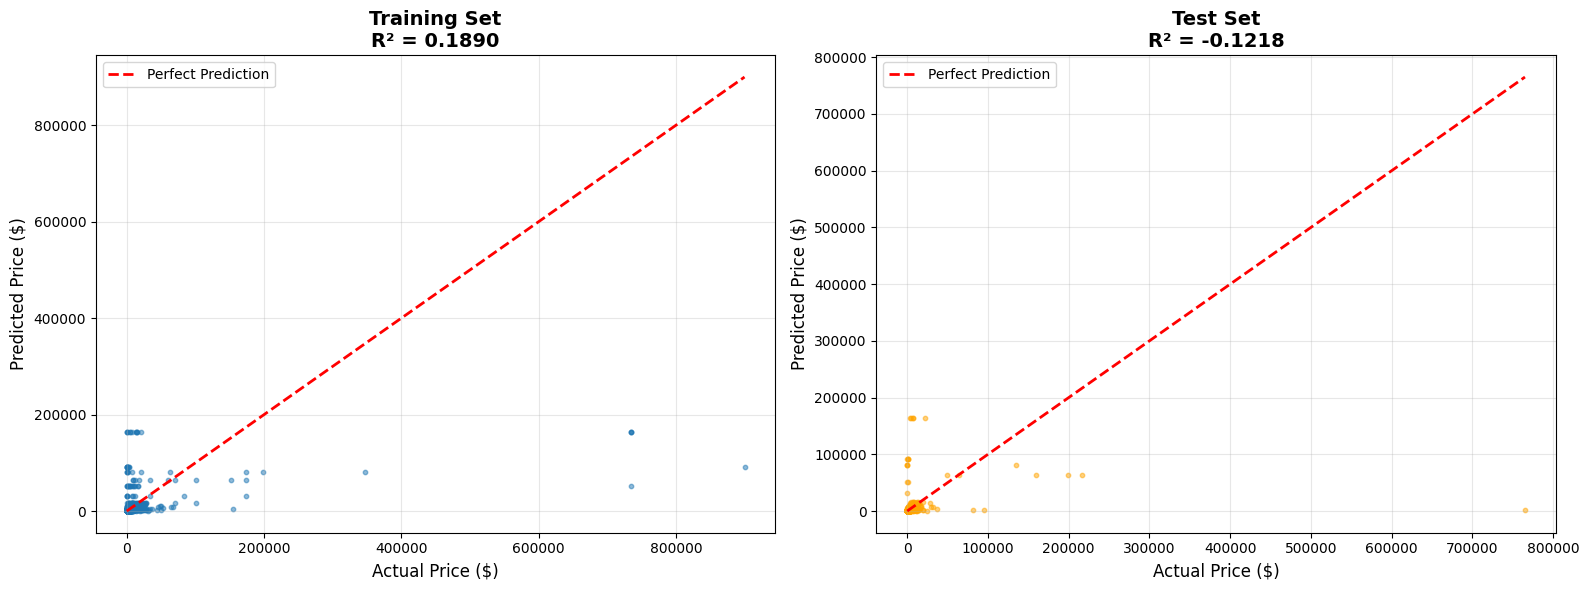

✓ Visualization complete!


In [54]:
# Visualize Predictions vs Actual
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Training predictions
axes[0].scatter(y_train, y_pred_train, alpha=0.5, s=10)
axes[0].plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($)', fontsize=12)
axes[0].set_ylabel('Predicted Price ($)', fontsize=12)
axes[0].set_title(f'Training Set\nR² = {train_r2:.4f}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Test predictions
axes[1].scatter(y_test, y_pred_test, alpha=0.5, s=10, color='orange')
axes[1].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price ($)', fontsize=12)
axes[1].set_ylabel('Predicted Price ($)', fontsize=12)
axes[1].set_title(f'Test Set\nR² = {test_r2:.4f}', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualization complete!")

Top 10 Most Important Features (Decision Tree):
  is_private_room                0.2814
  room_type                      0.1762
  bathrooms_count                0.1342
  maximum_nights                 0.0975
  instant_bookable               0.0859
  booking_flexibility            0.0644
  review_recency_score           0.0538
  total_capacity                 0.0305
  is_central_location            0.0304
  longitude                      0.0242


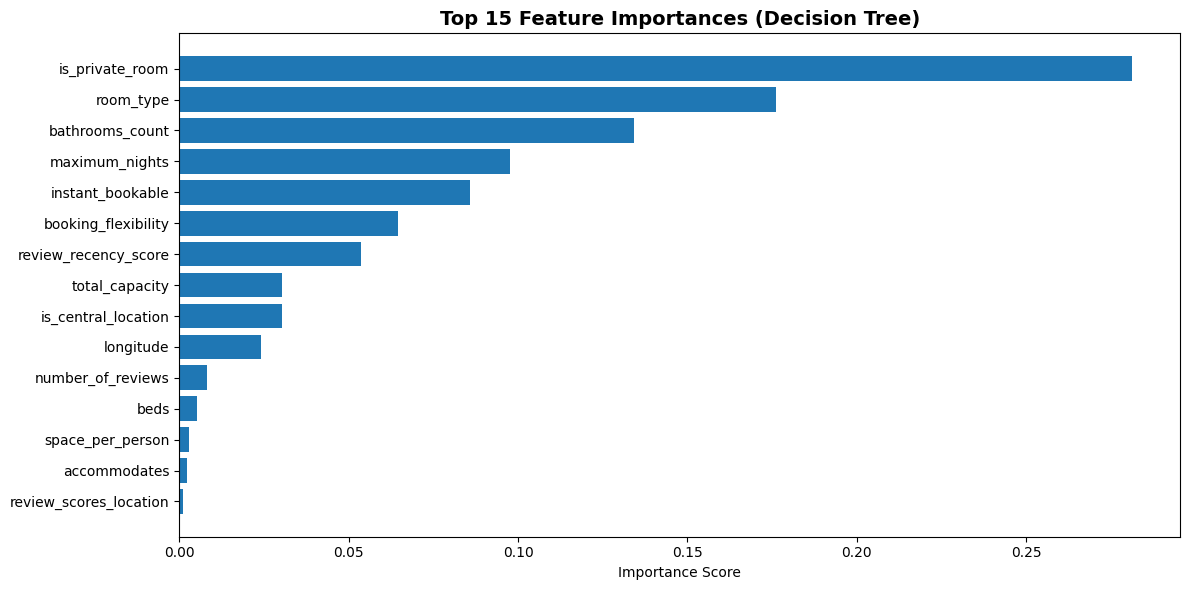

In [55]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': selected_features_list,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 Most Important Features (Decision Tree):")
for idx, row in feature_importance.head(10).iterrows():
    print(f"  {row['Feature']:30s} {row['Importance']:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score')
plt.title('Top 15 Feature Importances (Decision Tree)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Ensamble

In [56]:
# Random Forest - Ensemble method that reduces overfitting
from sklearn.ensemble import RandomForestRegressor

print("=" * 70)
print("RANDOM FOREST REGRESSOR")
print("=" * 70)

# Train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,
    min_samples_split=30,
    min_samples_leaf=15,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Metrics
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)

print(f"\nTRAINING - R²: {rf_train_r2:.4f}")
print(f"TEST     - R²: {rf_test_r2:.4f} | RMSE: ${rf_test_rmse:,.2f} | MAE: ${rf_test_mae:,.2f}")
print(f"Overfitting Gap: {rf_train_r2 - rf_test_r2:.4f}")

# Compare with Decision Tree
print(f"\n{'Metric':<20} {'Decision Tree':<20} {'Random Forest':<20}")
print("-" * 60)
print(f"{'Test R²':<20} {test_r2:<20.4f} {rf_test_r2:<20.4f}")
print(f"{'Test RMSE':<20} ${test_rmse:<19,.2f} ${rf_test_rmse:<19,.2f}")

if rf_test_r2 > test_r2:
    print("\n✓ Random Forest performs better!")


RANDOM FOREST REGRESSOR

TRAINING - R²: 0.1375
TEST     - R²: 0.0410 | RMSE: $11,521.87 | MAE: $1,096.74
Overfitting Gap: 0.0965

Metric               Decision Tree        Random Forest       
------------------------------------------------------------
Test R²              -0.1218              0.0410              
Test RMSE            $12,461.56           $11,521.87          

✓ Random Forest performs better!


## Modelos redes neuronales

In [57]:
# Neural Network Model for Price Prediction
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

print("=" * 70)
print("NEURAL NETWORK FOR PRICE PREDICTION")
print("=" * 70)

# Prepare data with only selected features
X_nn = df_kb[selected_features_list].copy()
y_nn = df_kb['price_numeric'].copy()

# Split data
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_nn, y_nn, test_size=0.2, random_state=42
)

# Scale features for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nn)
X_test_scaled = scaler.transform(X_test_nn)

# Train Neural Network with simple architecture
nn_model = MLPRegressor(
    hidden_layer_sizes=(30,),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    verbose=False
)

nn_model.fit(X_train_scaled, y_train_nn)

# Make predictions
nn_train_pred = nn_model.predict(X_train_scaled)
nn_test_pred = nn_model.predict(X_test_scaled)

# Evaluate model
nn_train_r2 = r2_score(y_train_nn, nn_train_pred)
nn_train_rmse = np.sqrt(mean_squared_error(y_train_nn, nn_train_pred))
nn_train_mae = mean_absolute_error(y_train_nn, nn_train_pred)

nn_test_r2 = r2_score(y_test_nn, nn_test_pred)
nn_test_rmse = np.sqrt(mean_squared_error(y_test_nn, nn_test_pred))
nn_test_mae = mean_absolute_error(y_test_nn, nn_test_pred)

print(f"\nTRAINING - R²: {nn_train_r2:.4f} | RMSE: ${nn_train_rmse:,.2f} | MAE: ${nn_train_mae:,.2f}")
print(f"TEST     - R²: {nn_test_r2:.4f} | RMSE: ${nn_test_rmse:,.2f} | MAE: ${nn_test_mae:,.2f}")
print(f"Overfitting Gap: {nn_train_r2 - nn_test_r2:.4f}")


NEURAL NETWORK FOR PRICE PREDICTION

TRAINING - R²: 0.0251 | RMSE: $12,343.54 | MAE: $1,234.76
TEST     - R²: 0.0326 | RMSE: $11,572.36 | MAE: $1,259.98
Overfitting Gap: -0.0075


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


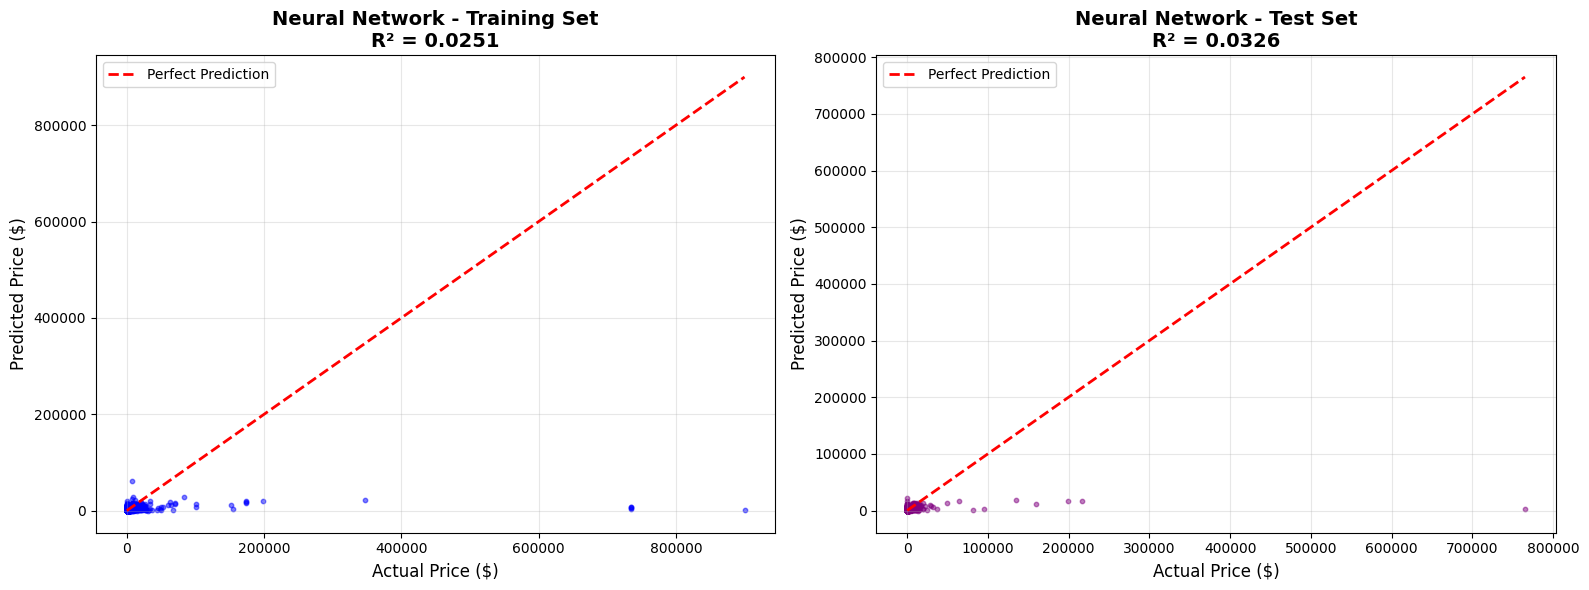

✓ Visualization complete!


In [58]:
# Visualize Neural Network Predictions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Training predictions
axes[0].scatter(y_train_nn, nn_train_pred, alpha=0.5, s=10, color='blue')
axes[0].plot([y_train_nn.min(), y_train_nn.max()], 
             [y_train_nn.min(), y_train_nn.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($)', fontsize=12)
axes[0].set_ylabel('Predicted Price ($)', fontsize=12)
axes[0].set_title(f'Neural Network - Training Set\nR² = {nn_train_r2:.4f}', 
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Test predictions
axes[1].scatter(y_test_nn, nn_test_pred, alpha=0.5, s=10, color='purple')
axes[1].plot([y_test_nn.min(), y_test_nn.max()], 
             [y_test_nn.min(), y_test_nn.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price ($)', fontsize=12)
axes[1].set_ylabel('Predicted Price ($)', fontsize=12)
axes[1].set_title(f'Neural Network - Test Set\nR² = {nn_test_r2:.4f}', 
                  fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualization complete!")

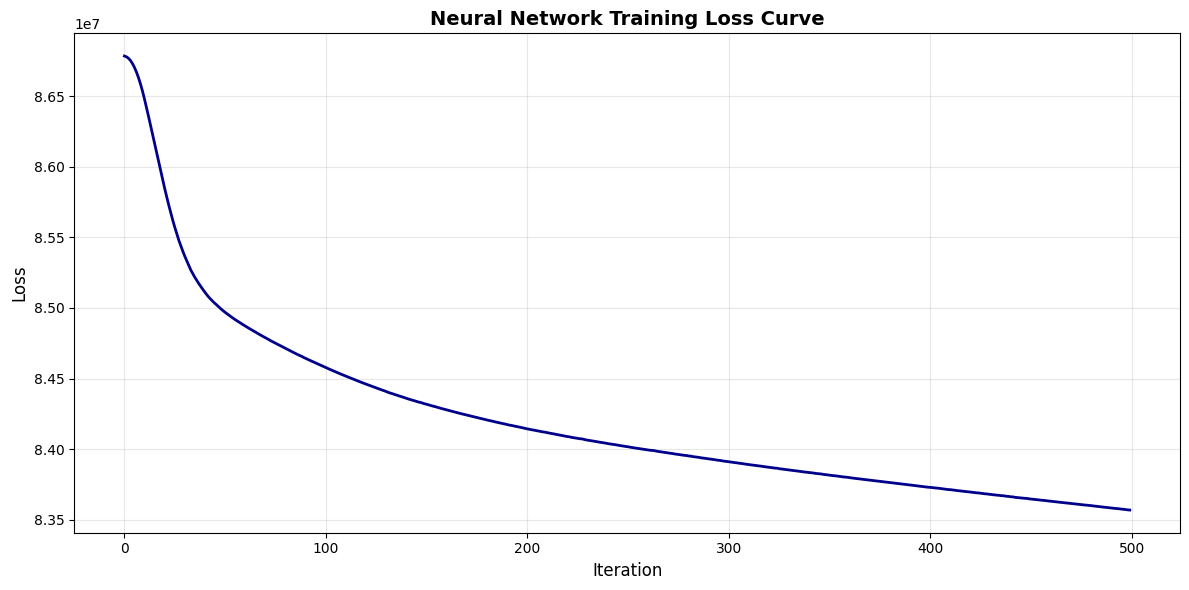

Final loss: 83,570,075.13


In [59]:
# Visualize Training Loss Curve
if hasattr(nn_model, 'loss_curve_'):
    plt.figure(figsize=(12, 6))
    plt.plot(nn_model.loss_curve_, linewidth=2, color='darkblue')
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Neural Network Training Loss Curve', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Final loss: {nn_model.loss_curve_[-1]:,.2f}")


### Hiperparametrización

In [60]:
# Hyperparameter Tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

print("=" * 70)
print("HYPERPARAMETER TUNING: RandomizedSearchCV")
print("=" * 70)

# Define hyperparameter space
param_distributions = {
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'hidden_layer_sizes': [(30,), (40,), (50,), (40, 20), (50, 25), (60, 30)],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'max_iter': [300, 500, 700]
}

# Create base model
base_nn_model = MLPRegressor(
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    verbose=False
)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=base_nn_model,
    param_distributions=param_distributions,
    n_iter=30,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("\nTraining 30 combinations with 3-fold CV...")
random_search.fit(X_train_scaled, y_train_nn)

# Best parameters
print("\n✓ BEST HYPERPARAMETERS:")
for param, value in random_search.best_params_.items():
    print(f"  • {param:25s}: {value}")

print(f"\n✓ Best CV R² Score: {random_search.best_score_:.4f}")

# Get the best model
best_nn_model = random_search.best_estimator_

# Evaluate best model on test set
best_train_pred = best_nn_model.predict(X_train_scaled)
best_test_pred = best_nn_model.predict(X_test_scaled)

best_train_r2 = r2_score(y_train_nn, best_train_pred)
best_test_r2 = r2_score(y_test_nn, best_test_pred)
best_test_rmse = np.sqrt(mean_squared_error(y_test_nn, best_test_pred))
best_test_mae = mean_absolute_error(y_test_nn, best_test_pred)

print(f"\nTRAINING - R²: {best_train_r2:.4f}")
print(f"TEST     - R²: {best_test_r2:.4f} | RMSE: ${best_test_rmse:,.2f} | MAE: ${best_test_mae:,.2f}")
print(f"Overfitting Gap: {best_train_r2 - best_test_r2:.4f}")


HYPERPARAMETER TUNING: RandomizedSearchCV

Training 30 combinations with 3-fold CV...
Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/neural_network/_base.py:188: RuntimeWarning: overflow encountered in square
  0.5 * np.average((y_true - y_pred) ** 2, weights=sample_weight, axis=0).mean()
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/neural_network/_multilayer_perceptron.py:352: RuntimeWarning: overflow encountered in dot
  values += np.dot(s, s)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/neural_network/_multilayer_perceptron.py:352: RuntimeWarning: overflow encountered in dot
  values += np.dot(s, s)
/Librar


✓ BEST HYPERPARAMETERS:
  • solver                   : adam
  • max_iter                 : 700
  • learning_rate_init       : 0.001
  • hidden_layer_sizes       : (50, 25)
  • alpha                    : 0.01
  • activation               : relu

✓ Best CV R² Score: 0.0327

TRAINING - R²: 0.0774
TEST     - R²: 0.0567 | RMSE: $11,427.33 | MAE: $1,205.24
Overfitting Gap: 0.0208


In [61]:
# Compare original vs optimized neural network
comparison_nn = pd.DataFrame({
    'Model': ['Original NN', 'Optimized NN'],
    'Test R²': [nn_test_r2, best_test_r2],
    'Test RMSE': [nn_test_rmse, best_test_rmse],
    'Test MAE': [nn_test_mae, best_test_mae],
    'Overfitting Gap': [nn_train_r2 - nn_test_r2, best_train_r2 - best_test_r2]
})

print("\n" + comparison_nn.to_string(index=False))

# Calculate improvement
r2_improvement = ((best_test_r2 - nn_test_r2) / nn_test_r2) * 100

if best_test_r2 > nn_test_r2:
    print(f"\n✓ R² improved by: {r2_improvement:.2f}%")
else:
    print(f"\n→ Original model was better (difference: {r2_improvement:.2f}%)")



       Model  Test R²    Test RMSE    Test MAE  Overfitting Gap
 Original NN 0.032553 11572.362435 1259.983312        -0.007499
Optimized NN 0.056651 11427.326069 1205.239079         0.020789

✓ R² improved by: 74.03%


TOP 5 HYPERPARAMETER COMBINATIONS:

Rank | CV R² | Activation | Solver | Hidden Layers
-----------------------------------------------------------------
   1 | 0.0327 | relu       | adam   | (50, 25)
   2 | 0.0290 | relu       | adam   | (50, 25)
   3 | 0.0113 | tanh       | sgd    | (50,)
   4 | 0.0100 | relu       | adam   | (50,)
   5 | 0.0092 | relu       | adam   | (60, 30)


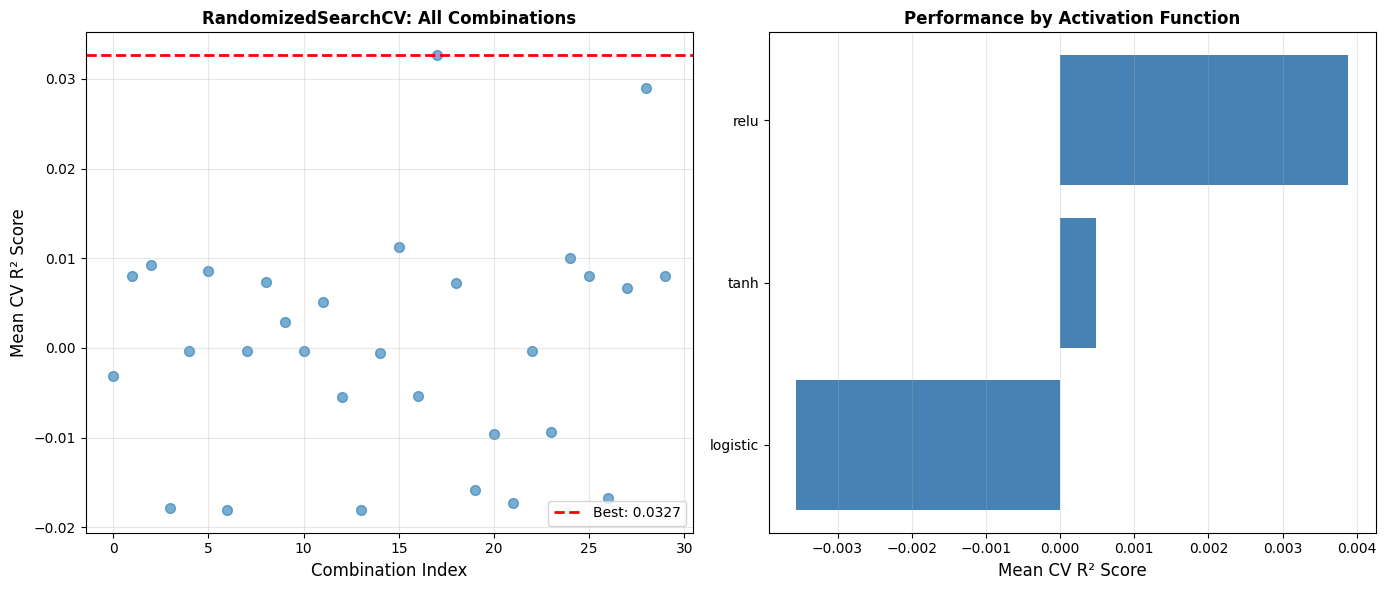

In [62]:
# Visualize RandomizedSearchCV results
cv_results = pd.DataFrame(random_search.cv_results_)
cv_results_sorted = cv_results.sort_values('rank_test_score')

print("TOP 5 HYPERPARAMETER COMBINATIONS:")
print("\nRank | CV R² | Activation | Solver | Hidden Layers")
print("-" * 65)

for idx, row in cv_results_sorted.head(5).iterrows():
    print(f"{row['rank_test_score']:4.0f} | {row['mean_test_score']:.4f} | "
          f"{row['param_activation']:10s} | {row['param_solver']:6s} | "
          f"{str(row['param_hidden_layer_sizes'])}")

# Plot CV scores distribution
plt.figure(figsize=(14, 6))

# Subplot 1: R² scores for all combinations
plt.subplot(1, 2, 1)
plt.scatter(range(len(cv_results)), cv_results['mean_test_score'], alpha=0.6, s=50)
plt.axhline(y=random_search.best_score_, color='r', linestyle='--', 
            linewidth=2, label=f'Best: {random_search.best_score_:.4f}')
plt.xlabel('Combination Index', fontsize=12)
plt.ylabel('Mean CV R² Score', fontsize=12)
plt.title('RandomizedSearchCV: All Combinations', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Effect of activation function
plt.subplot(1, 2, 2)
activation_scores = cv_results.groupby('param_activation')['mean_test_score'].mean().sort_values()
plt.barh(range(len(activation_scores)), activation_scores.values, color='steelblue')
plt.yticks(range(len(activation_scores)), activation_scores.index)
plt.xlabel('Mean CV R² Score', fontsize=12)
plt.title('Performance by Activation Function', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


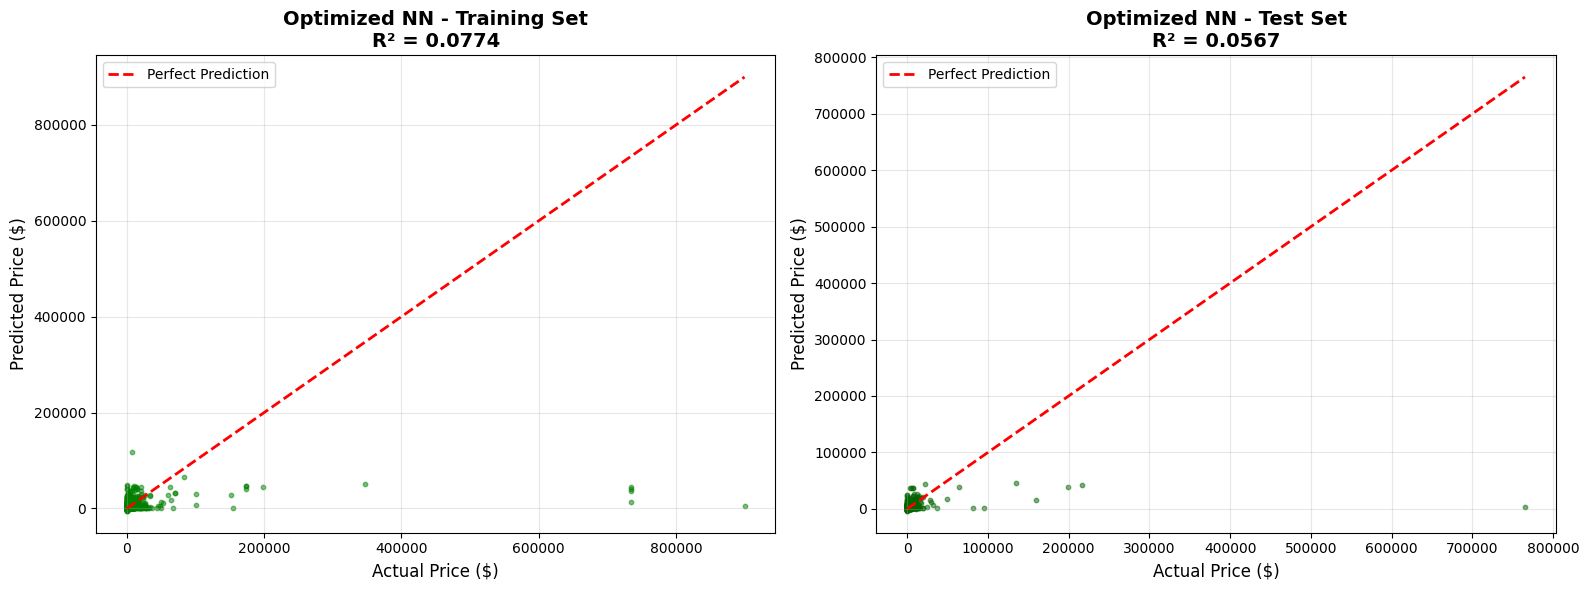

✓ Optimized model visualization complete!


In [63]:
# Visualize predictions of optimized model
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Training predictions
axes[0].scatter(y_train_nn, best_train_pred, alpha=0.5, s=10, color='green')
axes[0].plot([y_train_nn.min(), y_train_nn.max()], 
             [y_train_nn.min(), y_train_nn.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($)', fontsize=12)
axes[0].set_ylabel('Predicted Price ($)', fontsize=12)
axes[0].set_title(f'Optimized NN - Training Set\nR² = {best_train_r2:.4f}', 
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Test predictions
axes[1].scatter(y_test_nn, best_test_pred, alpha=0.5, s=10, color='darkgreen')
axes[1].plot([y_test_nn.min(), y_test_nn.max()], 
             [y_test_nn.min(), y_test_nn.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price ($)', fontsize=12)
axes[1].set_ylabel('Predicted Price ($)', fontsize=12)
axes[1].set_title(f'Optimized NN - Test Set\nR² = {best_test_r2:.4f}', 
                  fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Optimized model visualization complete!")

FINAL MODEL COMPARISON

                     Model   Test R²    Test RMSE    Test MAE  Overfitting Gap
             Decision Tree -0.121832 12461.559546 1105.573023         0.310848
             Random Forest  0.040977 11521.869749 1096.737091         0.096505
 Neural Network (Original)  0.032553 11572.362435 1259.983312        -0.007499
Neural Network (Optimized)  0.056651 11427.326069 1205.239079         0.020789

🏆 BEST MODEL: Neural Network (Optimized)
   R²: 0.0567 | RMSE: $11,427.33 | MAE: $1,205.24


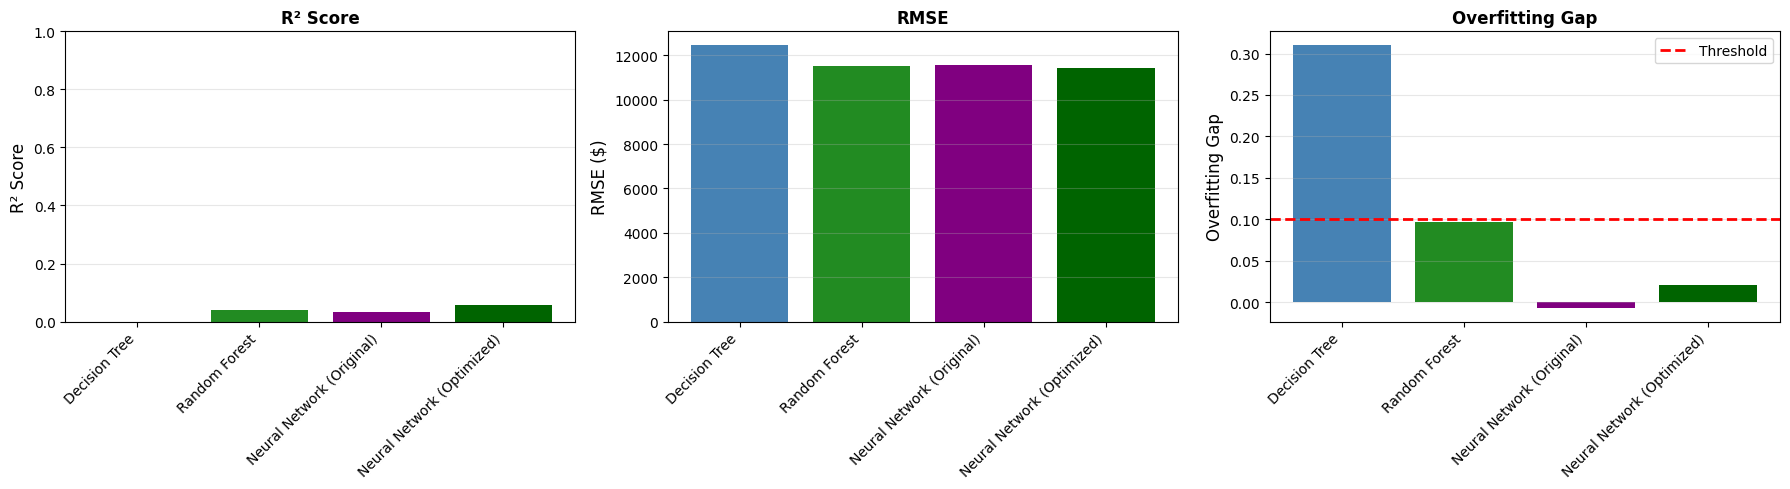

In [64]:
# Final comparison: ALL models
print("=" * 70)
print("FINAL MODEL COMPARISON")
print("=" * 70)

final_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Neural Network (Original)', 'Neural Network (Optimized)'],
    'Test R²': [test_r2, rf_test_r2, nn_test_r2, best_test_r2],
    'Test RMSE': [test_rmse, rf_test_rmse, nn_test_rmse, best_test_rmse],
    'Test MAE': [test_mae, rf_test_mae, nn_test_mae, best_test_mae],
    'Overfitting Gap': [
        train_r2 - test_r2,
        rf_train_r2 - rf_test_r2,
        nn_train_r2 - nn_test_r2,
        best_train_r2 - best_test_r2
    ]
})

print("\n" + final_comparison.to_string(index=False))

# Find best model overall
best_overall_idx = final_comparison['Test R²'].idxmax()
best_overall_name = final_comparison.loc[best_overall_idx, 'Model']

print(f"\n🏆 BEST MODEL: {best_overall_name}")
print(f"   R²: {final_comparison.loc[best_overall_idx, 'Test R²']:.4f} | "
      f"RMSE: ${final_comparison.loc[best_overall_idx, 'Test RMSE']:,.2f} | "
      f"MAE: ${final_comparison.loc[best_overall_idx, 'Test MAE']:,.2f}")

# Visualize final comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = final_comparison['Model']
colors = ['steelblue', 'forestgreen', 'purple', 'darkgreen']

# R² Score comparison
axes[0].bar(range(len(models)), final_comparison['Test R²'], color=colors)
axes[0].set_xticks(range(len(models)))
axes[0].set_xticklabels(models, rotation=45, ha='right')
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('R² Score', fontsize=12, fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3, axis='y')

# RMSE comparison
axes[1].bar(range(len(models)), final_comparison['Test RMSE'], color=colors)
axes[1].set_xticks(range(len(models)))
axes[1].set_xticklabels(models, rotation=45, ha='right')
axes[1].set_ylabel('RMSE ($)', fontsize=12)
axes[1].set_title('RMSE', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Overfitting Gap comparison
axes[2].bar(range(len(models)), final_comparison['Overfitting Gap'], color=colors)
axes[2].set_xticks(range(len(models)))
axes[2].set_xticklabels(models, rotation=45, ha='right')
axes[2].set_ylabel('Overfitting Gap', fontsize=12)
axes[2].set_title('Overfitting Gap', fontsize=12, fontweight='bold')
axes[2].axhline(y=0.1, color='red', linestyle='--', linewidth=2, label='Threshold')
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
